In [1]:
import dataset
from importlib import reload
import skimage
import numpy as np

Image parameters settings: {'A': [500, 2000], 'bg': [0, 100], 'x': [-11.2, 11.2], 'y': [-11.2, 11.2], 'sig_x': [5, 5], 'sig_y': [5, 5]}
10:	 [id = 10.000,], [A = 1375.318,], [bg = 26.422,], [x = -9.249,], [y = 1.775,], [z = 0.000,], [sig_x = 5.000,], [sig_y = 5.000,],
15:	 [id = 15.000,], [A = 1499.778,], [bg = 90.870,], [x = -2.995,], [y = -2.322,], [z = 0.000,], [sig_x = 5.000,], [sig_y = 5.000,],
4:	 [id = 4.000,], [A = 1571.845,], [bg = 12.154,], [x = -8.803,], [y = 11.159,], [z = 0.000,], [sig_x = 5.000,], [sig_y = 5.000,],
0:	 [id = 0.000,], [A = 1143.440,], [bg = 9.620,], [x = 5.346,], [y = -9.040,], [z = 0.000,], [sig_x = 5.000,], [sig_y = 5.000,],
6:	 [id = 6.000,], [A = 1906.654,], [bg = 80.506,], [x = -2.274,], [y = -9.602,], [z = 0.000,], [sig_x = 5.000,], [sig_y = 5.000,],
1:	 [id = 1.000,], [A = 1322.972,], [bg = 94.829,], [x = 2.705,], [y = 9.650,], [z = 0.000,], [sig_x = 5.000,], [sig_y = 5.000,],
2:	 [id = 2.000,], [A = 1842.878,], [bg = 58.775,], [x = -1.954,], [y = 2

C:\GitHub\smlm-dl\smlm_dl\dataset.py:302: RuntimeWarning: invalid value encountered in log
  im = axes[1].imshow(np.log(tiled_images))


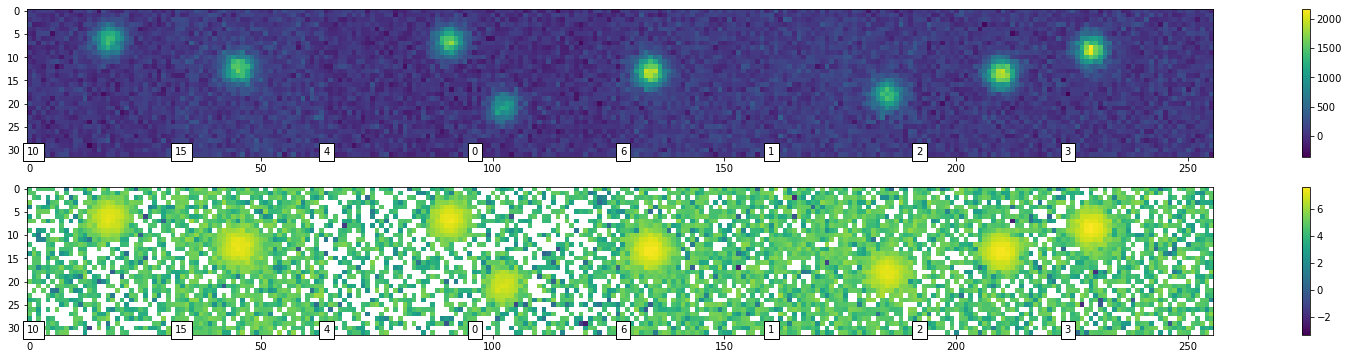

In [2]:
reload(dataset)
a = dataset.Gaussian2DPSFDataset(length=16,)# augmentations={})
dataset.inspect_images(a)

Image parameters settings: {'A': [500, 2000], 'bg': [0, 100], 'x': [-11.2, 11.2], 'y': [-11.2, 11.2], 'apod': False, 'pupil_scale': 0.75, 'psf_zerns': {0: 0}}
1:	 [id = 1.000,], [A = 887.758,], [bg = 58.893,], [x = -6.283,], [y = -7.152,], [z = 0.000,],
6:	 [id = 6.000,], [A = 744.675,], [bg = 80.117,], [x = -0.207,], [y = -0.768,], [z = 0.000,],
5:	 [id = 5.000,], [A = 1219.538,], [bg = 77.682,], [x = 4.776,], [y = 1.827,], [z = 0.000,],
9:	 [id = 9.000,], [A = 1075.971,], [bg = 5.470,], [x = 4.330,], [y = -4.973,], [z = 0.000,],
2:	 [id = 2.000,], [A = 754.013,], [bg = 97.869,], [x = -6.798,], [y = -8.924,], [z = 0.000,],
15:	 [id = 15.000,], [A = 1759.004,], [bg = 6.608,], [x = -5.400,], [y = -9.967,], [z = 0.000,],
0:	 [id = 0.000,], [A = 752.720,], [bg = 14.860,], [x = 5.837,], [y = 6.665,], [z = 0.000,],
14:	 [id = 14.000,], [A = 1265.059,], [bg = 23.665,], [x = 7.834,], [y = -5.278,], [z = 0.000,],


C:\GitHub\smlm-dl\smlm_dl\zernike.py:84: UserWarning: Attempting to set identical bottom == top == -0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(-y_lim, y_lim)


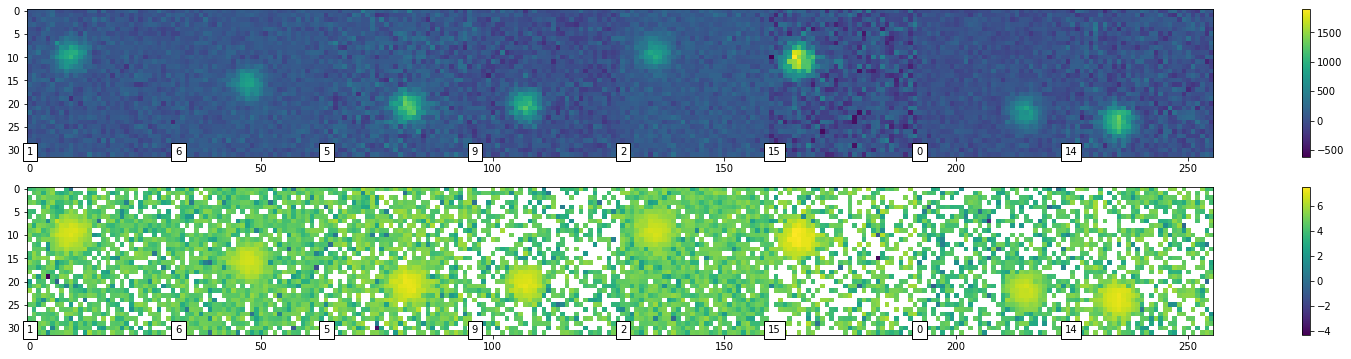

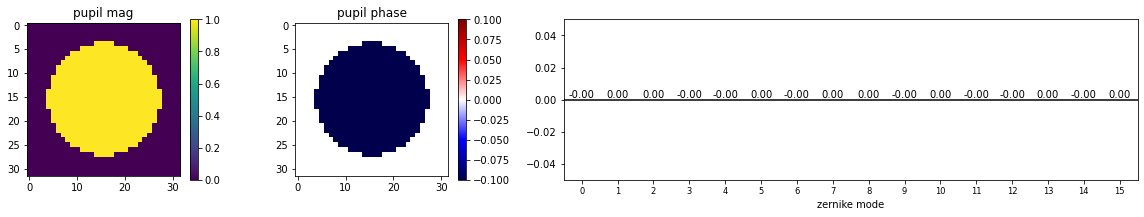

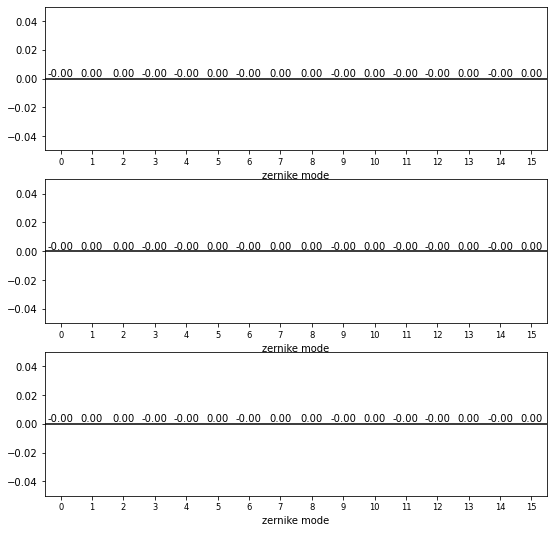

In [3]:
reload(dataset)
import zernike
reload(zernike)

a = dataset.FourierOpticsPSFDataset(length=16,
                                    out_size=(32,32),
                                    psf_zerns={0:0},#, 1:1, 2:0.2, 4:1, 5:2, 7:-2, 9:3},
                                    noise_params={},
                                    augmentations={dataset.Augmentation.NOISE_GAUSSIAN:0.1},
                                    normalize=False) #psf_zerns={4:0, 5:0.5, 7:1})
dataset.inspect_images(a)
# print(a.kx)



import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 1, figsize=(9, 9))
zernike.plot_zernike_coeffs(axes[0], zernike.fit_zernike_from_pupil(a.pupil, 16, a.pupil_suppl['radial_distance'], a.pupil_suppl['azimuthal_angle']))

correction = zernike.compensate_tip_tilt(np.angle(a.pupil), np.abs(a.pupil) <=0)
corrected_pupil = np.abs(a.pupil) * np.exp(1j * correction)
zernike.plot_zernike_coeffs(axes[1], zernike.fit_zernike_from_pupil(corrected_pupil, 16, a.pupil_suppl['radial_distance'], a.pupil_suppl['azimuthal_angle']))

correction = zernike.compensate_tip_tilt(np.angle(corrected_pupil), np.abs(corrected_pupil) <=0)
corrected_pupil = np.abs(corrected_pupil) * np.exp(1j * correction)
zernike.plot_zernike_coeffs(axes[2], zernike.fit_zernike_from_pupil(corrected_pupil, 16, a.pupil_suppl['radial_distance'], a.pupil_suppl['azimuthal_angle']))

Image parameters settings: {'A': [500, 2000], 'bg': [0, 100], 'x': [-11.2, 11.2], 'y': [-11.2, 11.2], 'apod': False, 'pupil_scale': 0.75, 'psf_zerns': {1: 0, 5: 2}}
13:	 [id = 13.000,], [A = 1718.880,], [bg = 1.443,], [x = 9.323,], [y = -6.935,], [z = 0.000,],
0:	 [id = 0.000,], [A = 1524.648,], [bg = 27.695,], [x = 7.882,], [y = -3.239,], [z = 0.000,],
15:	 [id = 15.000,], [A = 993.278,], [bg = 42.171,], [x = -1.672,], [y = 5.652,], [z = 0.000,],
9:	 [id = 9.000,], [A = 579.059,], [bg = 18.720,], [x = 8.218,], [y = -4.193,], [z = 0.000,],
7:	 [id = 7.000,], [A = 1423.079,], [bg = 70.450,], [x = -6.554,], [y = -6.714,], [z = 0.000,],
1:	 [id = 1.000,], [A = 1541.640,], [bg = 40.704,], [x = -2.820,], [y = -3.775,], [z = 0.000,],
5:	 [id = 5.000,], [A = 1740.809,], [bg = 10.550,], [x = -4.620,], [y = -9.442,], [z = 0.000,],
11:	 [id = 11.000,], [A = 844.437,], [bg = 34.617,], [x = -10.393,], [y = -1.848,], [z = 0.000,],


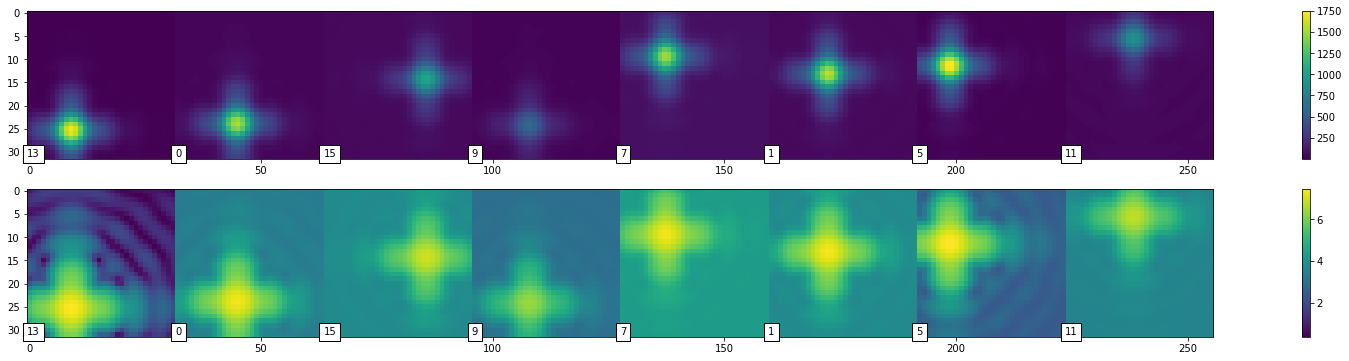

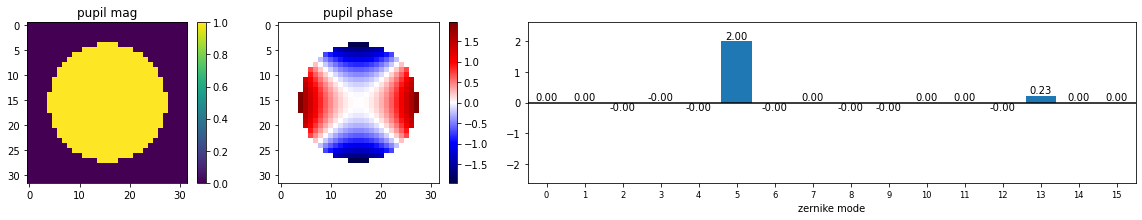

In [4]:
reload(dataset)

a = dataset.FourierOpticsPSFDataset(length=16,
                                      psf_zerns={1:0, 5:2},
                                      noise_params={},
                                      normalize=False,
                                     # psf_params={'pupil_scale':1},
                                     ) #psf_zerns={4:0, 5:0.5, 7:1})
dataset.inspect_images(a)
# print(a.kx)

Image parameters settings: {'A': [500, 2000], 'bg': [0, 100], 'x': [-11.2, 11.2], 'y': [-11.2, 11.2], 'apod': False, 'pupil_scale': 0.75, 'z': [-10, 10], 'psf_zerns': {1: 0, 5: 1}}
0:	 [id = 0.000,], [A = 1106.969,], [bg = 85.295,], [x = -2.574,], [y = 10.152,], [z = 3.319,],
2:	 [id = 2.000,], [A = 707.601,], [bg = 21.182,], [x = -0.650,], [y = 6.592,], [z = 6.474,],
8:	 [id = 8.000,], [A = 1581.183,], [bg = 90.826,], [x = -2.027,], [y = 7.842,], [z = 6.242,],
4:	 [id = 4.000,], [A = 1525.450,], [bg = 50.025,], [x = -6.650,], [y = -1.158,], [z = -2.653,],
1:	 [id = 1.000,], [A = 1635.081,], [bg = 41.081,], [x = 11.114,], [y = -7.320,], [z = -0.502,],
10:	 [id = 10.000,], [A = 1351.736,], [bg = 4.875,], [x = -3.431,], [y = 0.741,], [z = 0.612,],
14:	 [id = 14.000,], [A = 1868.263,], [bg = 6.788,], [x = -7.052,], [y = -9.702,], [z = -4.327,],
6:	 [id = 6.000,], [A = 923.950,], [bg = 99.399,], [x = 6.813,], [y = -2.129,], [z = 8.480,],


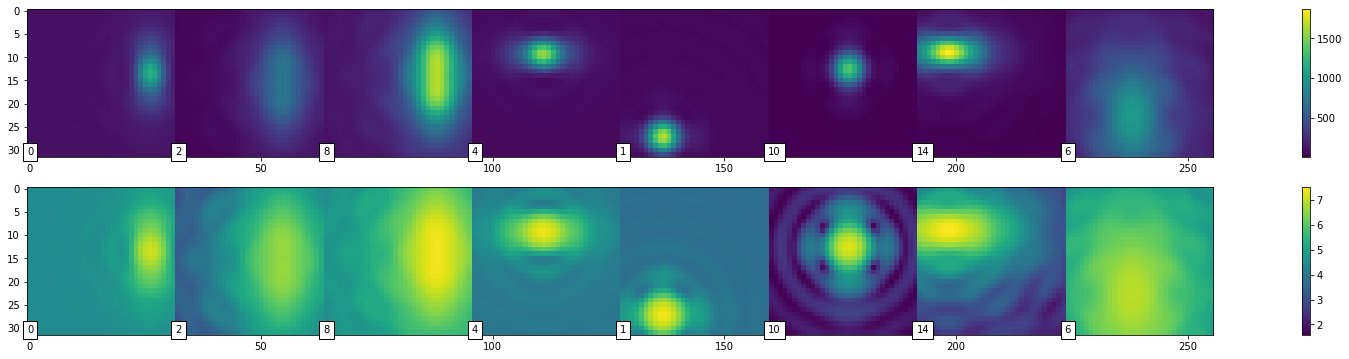

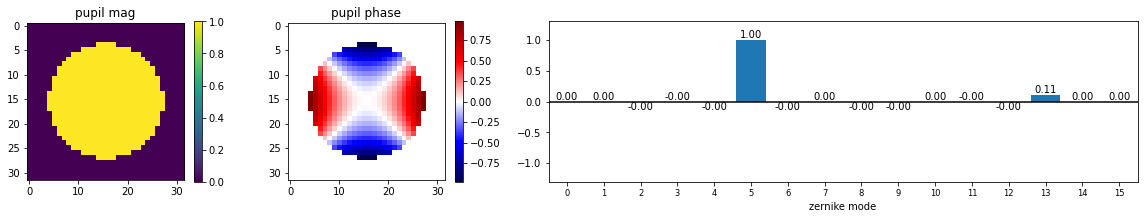

In [5]:
reload(dataset)

a = dataset.FourierOpticsPSFDataset(length=16,
                                    psf_params={'z':[-10,10]},
                                    psf_zerns={1:0, 5:1}, noise_params={}) #psf_zerns={4:0, 5:0.5, 7:1})
dataset.inspect_images(a)

Image parameters settings: {'A': [500, 2000], 'bg': [0, 100], 'x': [-22.4, 22.4], 'y': [-22.4, 22.4], 'sig_x': [5, 5], 'sig_y': [5, 5]}
15:	 [id = 15.000,], [A = 1819.406, 815.206, 844.170, 1193.238, 1650.586, 1750.914, 772.185, 1107.851,], [bg = 94.334,], [x = 20.899, -1.702, 21.120, -11.030, 0.407, -12.028, -10.918, 9.736,], [y = 16.434, -20.448, -11.753, 19.870, 1.930, 21.570, -12.458, 14.474,], [z = 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,], [sig_x = 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000,], [sig_y = 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000,],
8:	 [id = 8.000,], [A = 1753.245, 562.409, 844.305, 1165.466, 983.028, 1623.881, 1214.450, 1108.020,], [bg = 26.313,], [x = 11.043, 3.409, -19.367, 12.204, 17.139, 0.480, -5.015, -18.748,], [y = 8.805, 6.203, 8.914, -11.661, 1.507, -21.665, 2.049, 15.023,], [z = 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,], [sig_x = 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000, 5.000,], [sig_y = 5.00

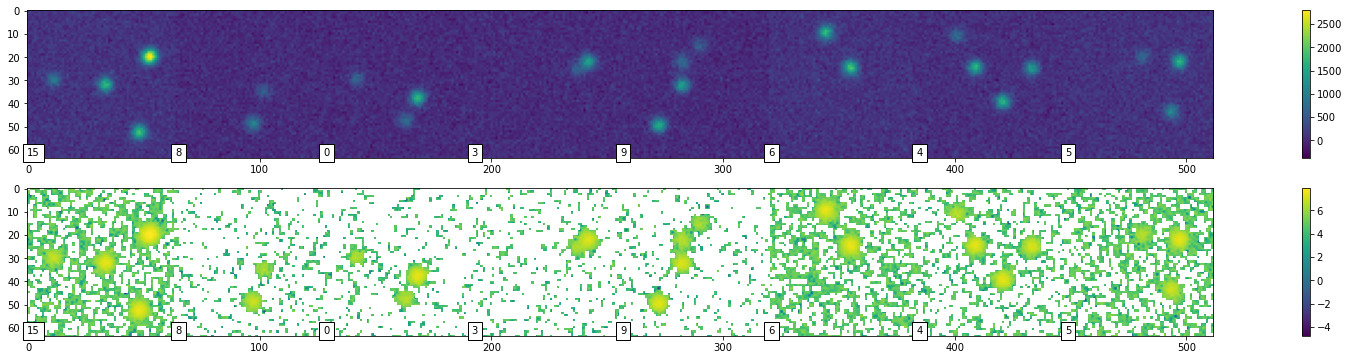

In [6]:
reload(dataset)

a = dataset.Gaussian2DPSFDataset(out_size=(64, 64), length=(16,8), dropout_p=0.5, )
dataset.inspect_images(a)

Image parameters settings: {'A': [500, 2000], 'bg': [0, 100], 'x': [-22.4, 22.4], 'y': [-22.4, 22.4], 'apod': False, 'pupil_scale': 0.75, 'z': [-10, 10], 'psf_zerns': {1: 0, 5: 1}}
14:	 [id = 14.000,], [A = 1568.479, 1220.135, 716.791, 800.356, 572.558, 1323.574, 1198.031, 1567.920,], [bg = 24.627,], [x = -14.981, -12.402, 5.679, 20.621, -18.864, -14.336, -15.856, -3.792,], [y = -8.579, -12.317, -19.779, -3.908, -21.617, 17.457, 1.092, -12.509,], [z = -4.348, -5.612, -1.021, 7.096, 7.602, -0.867, -9.567, 5.944,],
3:	 [id = 3.000,], [A = 1546.968, 888.059, 679.792, 1002.137, 628.839, 523.508, 1926.139, 520.784,], [bg = 62.500,], [x = -9.468, 7.885, -15.697, 10.825, -17.129, -0.221, 1.690, -2.534,], [y = 13.106, -12.005, 6.877, 1.714, 20.870, 8.282, 1.729, 6.364,], [z = 0.310, -0.431, -6.788, -7.804, 4.477, 5.645, -7.499, 0.188,],
8:	 [id = 8.000,], [A = 967.967, 753.051, 1587.530, 814.921, 1108.997, 637.426, 1980.757, 939.594,], [bg = 2.150,], [x = 16.572, -4.219, 16.968, -3.963, -16.95

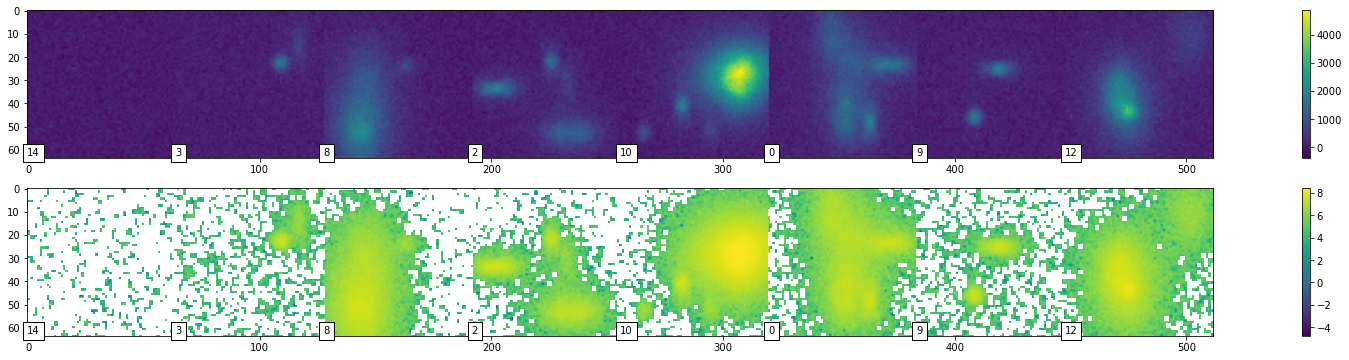

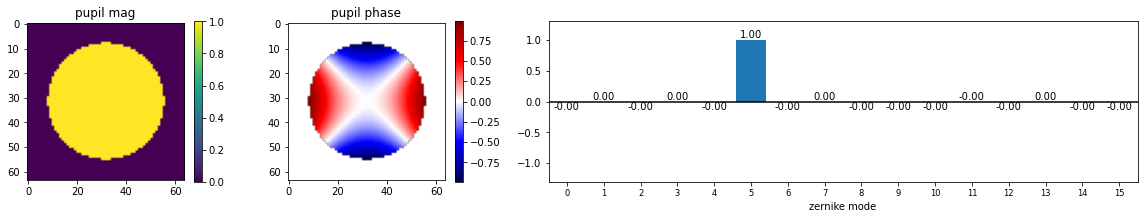

In [7]:
reload(dataset)

a = dataset.FourierOpticsPSFDataset(out_size=(64, 64), length=(16,8),
                                    psf_params={'z':[-10,10]},
                                    dropout_p=0.5, psf_zerns={1:0, 5:1}, ) #psf_zerns={4:0, 5:0.5, 7:1})
dataset.inspect_images(a)
print(a.params.keys())
for key, val in a.params.items():
    print(val.shape)

Image parameters settings: {'A': [0.5, 2.0], 'bg': [0, 10], 'x': [-5, 5], 'y': [-10, 10], 'data': array([[ 8,  9,  9, ..., 14, 15, 14],
       [ 9,  7,  9, ..., 16, 15, 14],
       [ 8,  8,  9, ..., 14, 16, 15],
       ...,
       [88, 95, 82, ..., 17, 24, 59],
       [92, 98, 92, ..., 17, 22, 55],
       [95, 93, 86, ..., 16, 18, 38]], dtype=uint8)}
2:	 [id = 2.000,], [A = 0.589,], [bg = 4.032,], [x = 4.717,], [y = 1.220,], [z = 0.000,],
4:	 [id = 4.000,], [A = 1.239,], [bg = 4.103,], [x = -3.832,], [y = 2.073,], [z = 0.000,],
5:	 [id = 5.000,], [A = 0.515,], [bg = 8.783,], [x = -1.314,], [y = -2.736,], [z = 0.000,],
7:	 [id = 7.000,], [A = 1.232,], [bg = 1.984,], [x = -1.256,], [y = -9.488,], [z = 0.000,],
6:	 [id = 6.000,], [A = 1.327,], [bg = 4.457,], [x = 4.405,], [y = -7.783,], [z = 0.000,],
1:	 [id = 1.000,], [A = 1.949,], [bg = 9.287,], [x = 0.957,], [y = 1.515,], [z = 0.000,],
0:	 [id = 0.000,], [A = 1.493,], [bg = 3.428,], [x = 0.024,], [y = -6.960,], [z = 0.000,],
3:	 [id = 

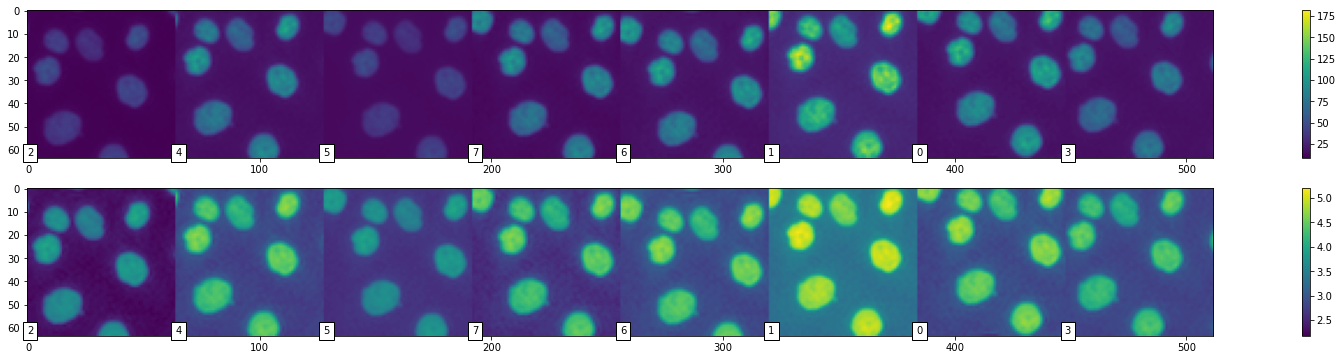

In [8]:
reload(dataset)

a = dataset.SingleImageDataset(skimage.data.human_mitosis()[20:, 20:], out_size=(64,64), length=8,
                               image_params={'x':[-5, +5],
                                             'y':[-10, +10],
                                           # 'conv':np.ones((3,3)),
                                          },
                               noise_params={}, augmentations={}, normalize=False)
dataset.inspect_images(a)